# Web Scraping Using Google Chrome Driver
## Author: Olivia Hinson
## Date: 5/12/2024

In [239]:
# Import library packages
from selenium import webdriver # Create driver to help scrape websites 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

import pandas as pd
import time

In [240]:
# Define the website to scrape (football matches)
website = 'https://www.adamchoi.co.uk/overs/detailed'
# Define path where we downloaded Chrome driver
path = r'<path to file>\chromedriver.exe'

In [241]:
# Initializing Google Chrome webdriver from local host as driver 
cService = webdriver.ChromeService(executable_path=path)
driver = webdriver.Chrome(service=cService)
driver.get(website)

**Opens a new Google Chrome window with full website**

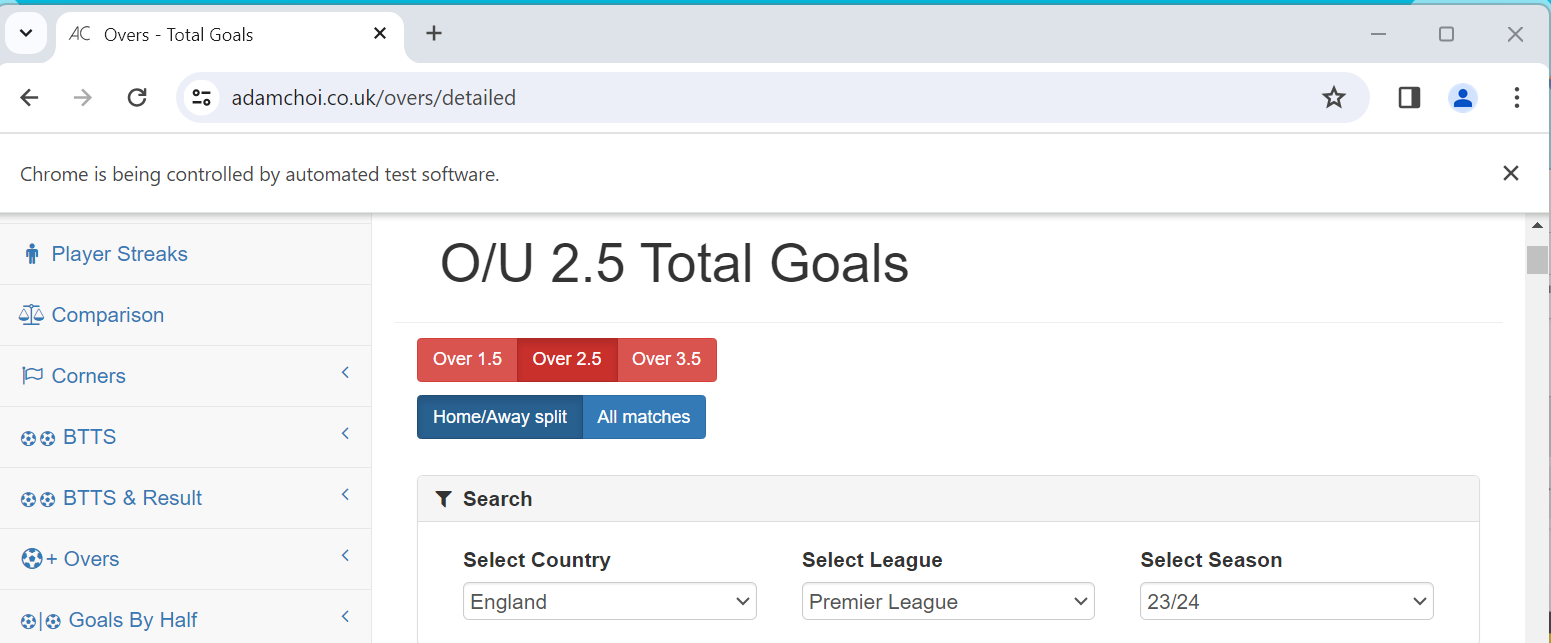
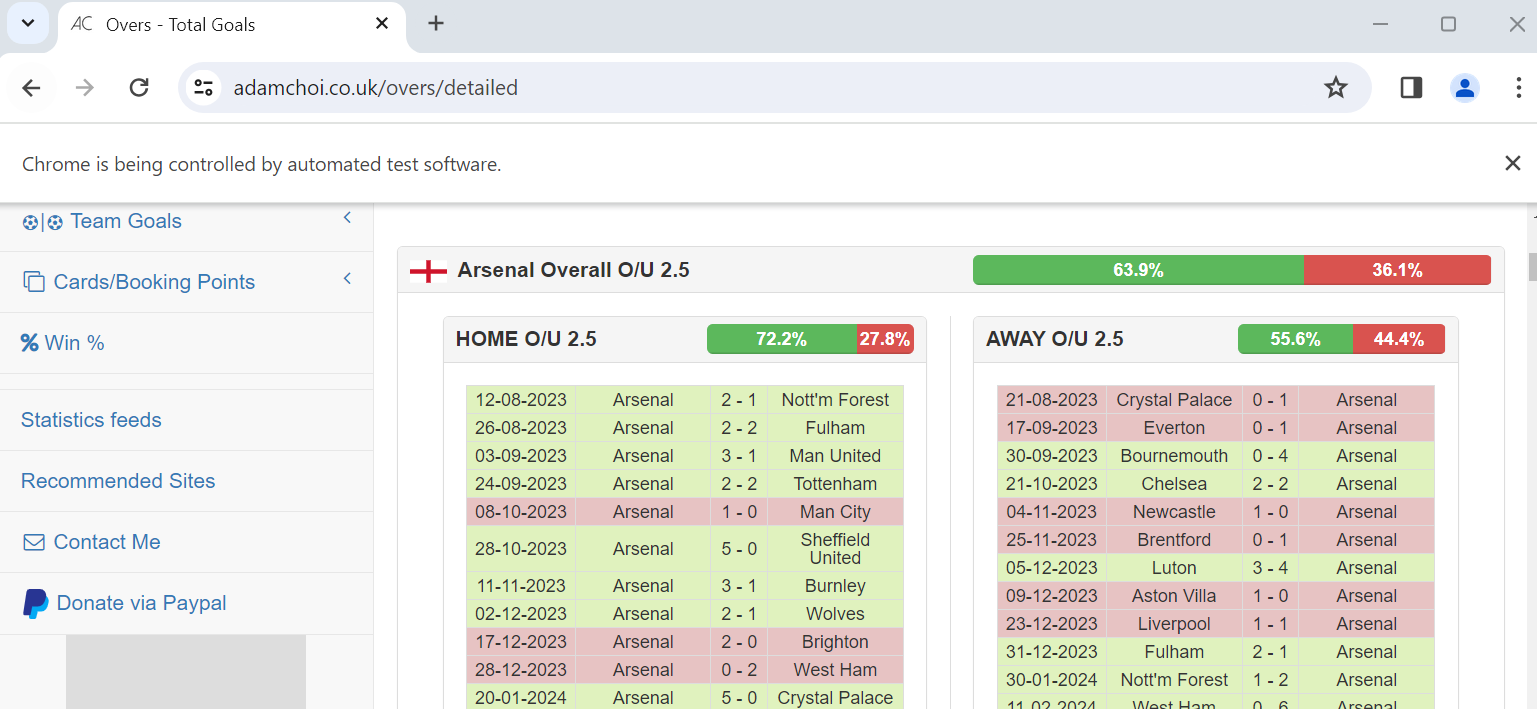

**Observations of website**

1. Webiste has data about football matches 
2. Data is stored in tables
3. Buttons are used to split data between matches (Home/Away split; All matches)
4. Search functionality to search for certain Country, Language, or Season

**1. Create one table per team**

Scrape all tables that correspond to each team 

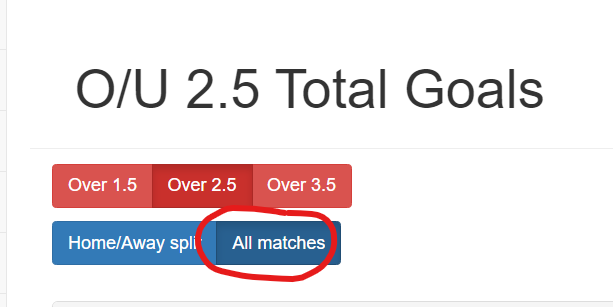
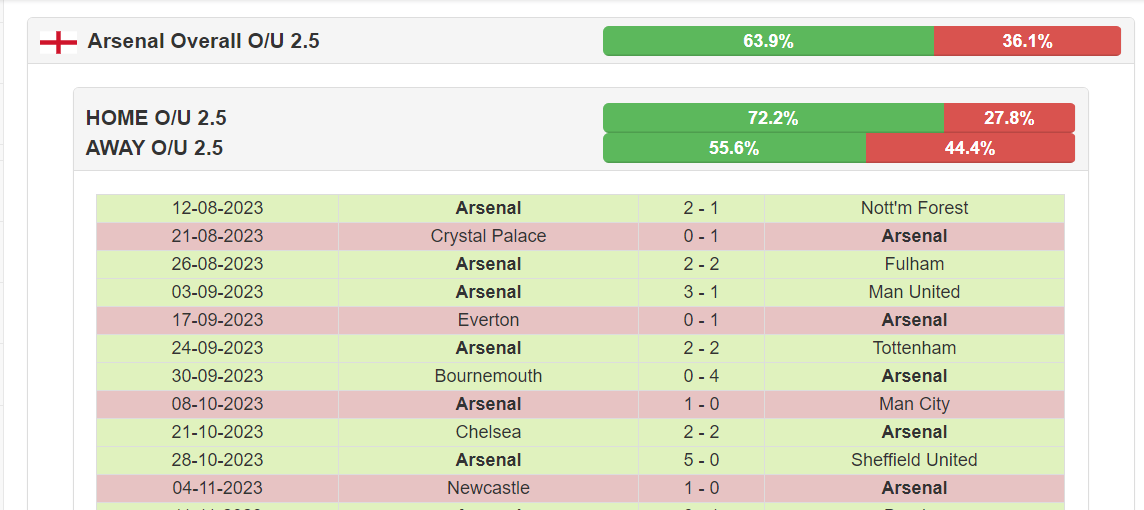

Inspect element of button to see if it has id or anything to use 

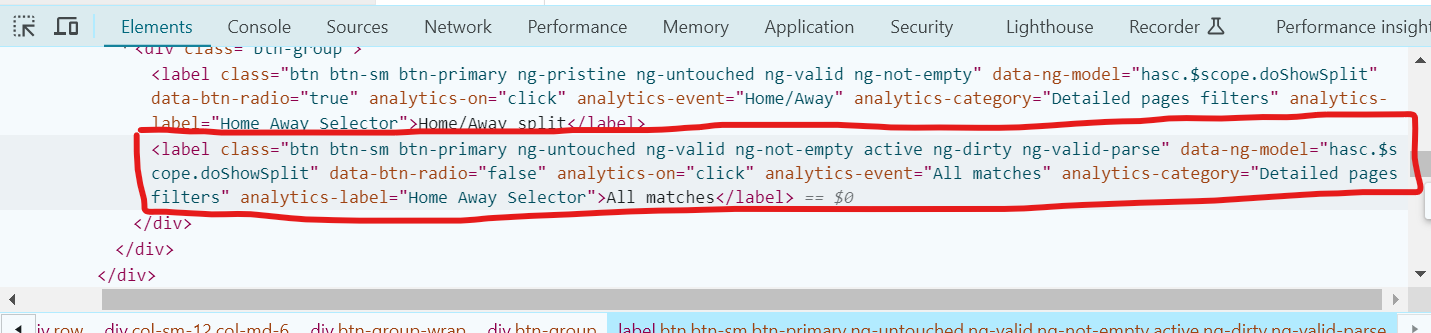

+ Does not have an id to refer to
+ Has weird class name

***Best approach**: Locate id with xpath using analytics-event attribute*

*Ctrl + f*, then xpath: **//tagName[@AttributeName=""Value]**
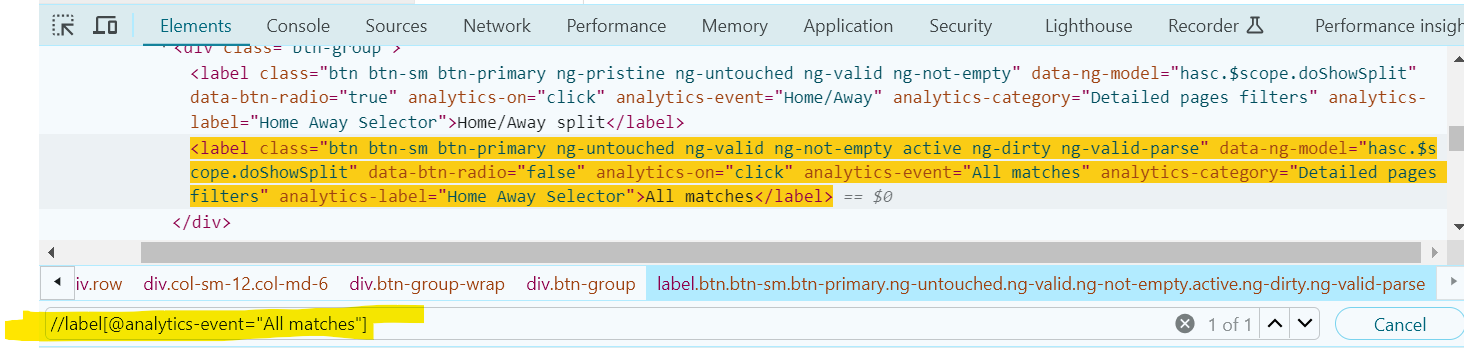

In [242]:
# Locate element with selenium 
all_matches_button = driver.find_element(By.XPATH, '//label[@analytics-event="All matches"]')
# Print out the HTML tag for the element you are trying to find 
#print(all_matches_button.get_attribute('outerHTML'))
# Click on All matches button
#all_matches_button.click()
# Almost guaranteed method for clicking the button without issue
driver.execute_script("arguments[0].click()", all_matches_button)

**Possible Errors**

When see this error, see which element is interrupting the click event for all_matches_button. Opening inspect tool in Google Chrome will readust position of error. Run the above line of code again for new coordinates. 

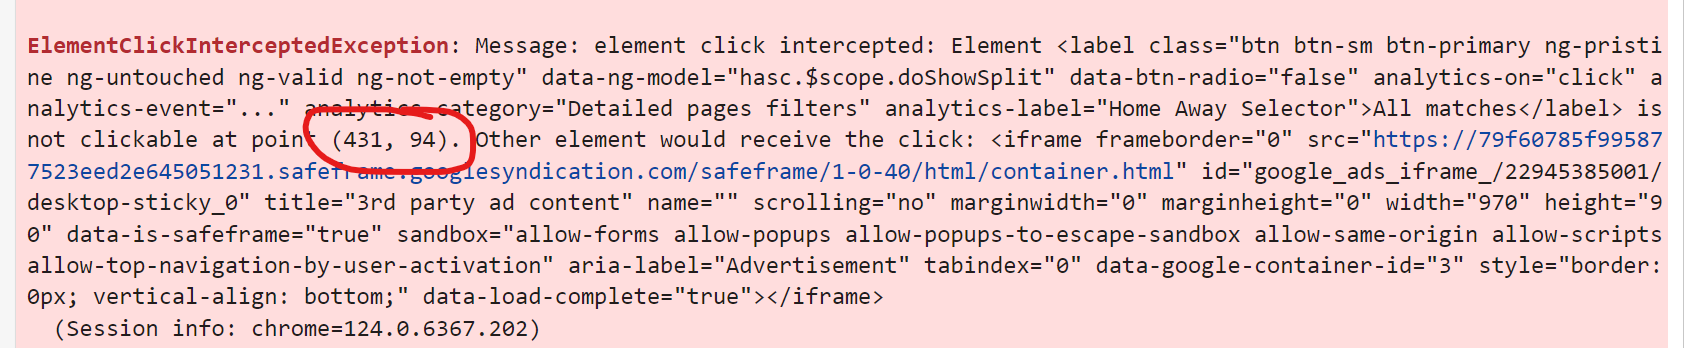

Run this in the Console of the Inspect tool

let div=document.createElement("div");<br>
div.append("<== CLICKED HERE");<br>
div.style.position="absolute";<br>
div.style.left="431px";<br>
div.style.top="94px";<br>
div.style.color="red";<br>
document.body.appendChild(div);<br> 
div.scrollIntoView(true);<br>

**Solution - ideal**<br>
*This is almost guaranteed to work for any click event*<br>
driver.execute_script("arguments[0].click()", all_matches_button)

**Other solutions**<br>
*Remove elements that block clicking of button*<br>
#driver.execute_script('document.getElementById("div-gpt-ad-1687041309521-0").remove()')

## Extracting Data From a Table

**2. Inspect element for table**
   
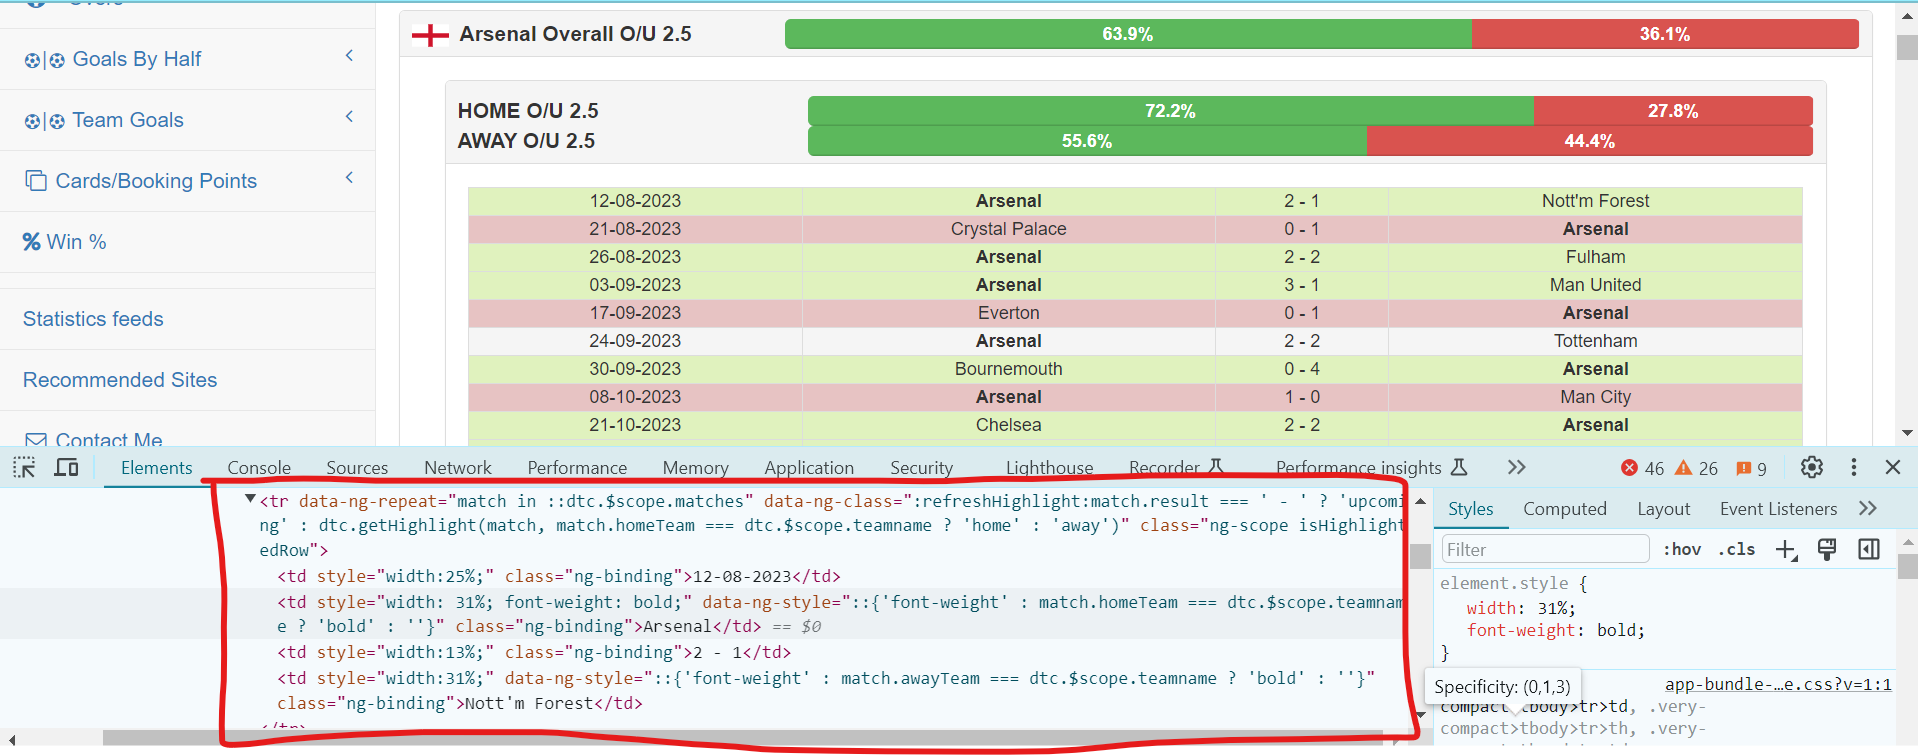

**Selecting Elements Within a Dropdown**

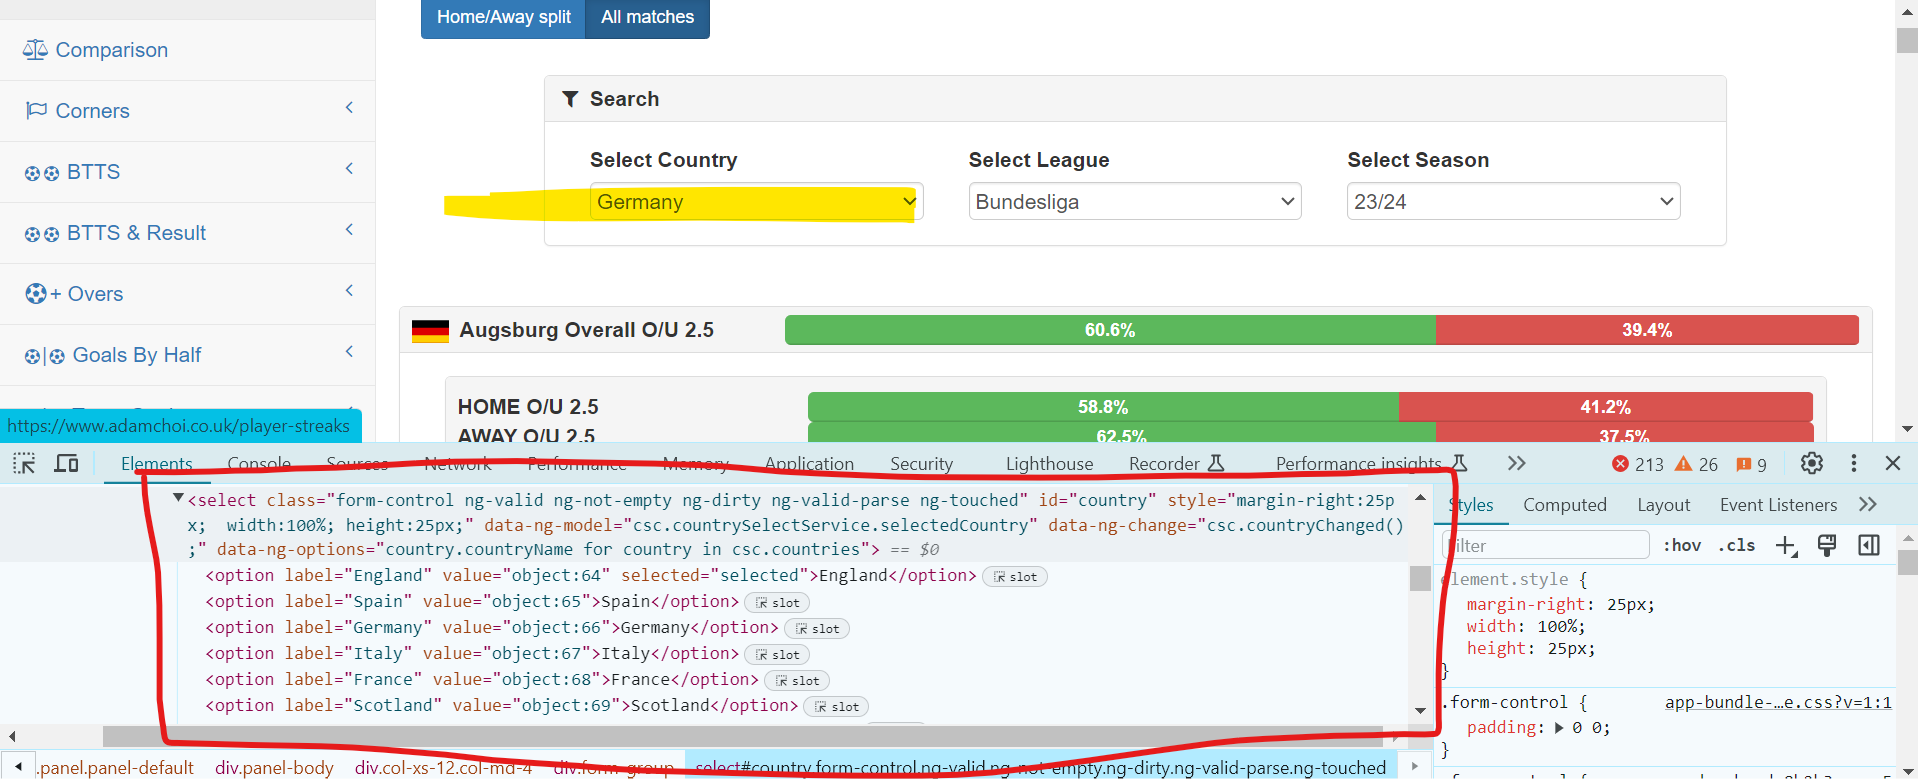

In [243]:
# Select elements within a dropdown 
dropdown = Select(driver.find_element(By.ID, 'country'))
dropdown.select_by_visible_text('Spain')
# Allow code to wait before executing next line 
time.sleep(3)

**3. Find element by tag name for all rows and data in table**

In [244]:
# Extract data from a table
# This will give a list we will need to look through later
matches = driver.find_elements(By.TAG_NAME, 'tr')

# Create separate lists for each column in table 
date = []
home_team = []
score = []
away_team = []

# Iterate over list 
for match in matches: 
    #print(match.text)
    date1 = match.find_element(By.XPATH, './td[1]').text #'//tr/td[1]'
    home = match.find_element(By.XPATH, './td[2]').text
    result = match.find_element(By.XPATH, './td[3]').text
    away = match.find_element(By.XPATH, './td[4]').text
    date.append(date1) 
    home_team.append(home)
    print(home)
    score.append(result)
    away_team.append(away)

Cadiz
Alaves
Getafe
Alaves
Vallecano
Alaves
Celta
Alaves
Alaves
Villarreal
Ath Madrid
Alaves
Barcelona
Alaves
Mallorca
Alaves
Girona
Alaves
Sociedad
Sevilla
Alaves
Almeria
Alaves
Alaves
Betis
Alaves
Osasuna
Alaves
Ath Bilbao
Alaves
Granada
Alaves
Alaves
Valencia
Alaves
Real Madrid
Almeria
Almeria
Cadiz
Almeria
Villarreal
Almeria
Sevilla
Almeria
Ath Bilbao
Girona
Almeria
Alaves
Almeria
Getafe
Almeria
Ath Madrid
Almeria
Barcelona
Osasuna
Almeria
Real Madrid
Almeria
Valencia
Almeria
Granada
Almeria
Celta
Almeria
Las Palmas
Almeria
Sociedad
Almeria
Almeria
Vallecano
Betis
Ath Bilbao
Osasuna
Ath Bilbao
Mallorca
Ath Bilbao
Alaves
Ath Bilbao
Sociedad
Ath Bilbao
Barcelona
Ath Bilbao
Villarreal
Ath Bilbao
Girona
Ath Bilbao
Granada
Ath Bilbao
Ath Bilbao
Sevilla
Ath Bilbao
Valencia
Cadiz
Ath Bilbao
Almeria
Ath Bilbao
Betis
Ath Bilbao
Las Palmas
Ath Bilbao
Real Madrid
Ath Bilbao
Ath Bilbao
Ath Madrid
Getafe
Ath Bilbao
Ath Madrid
Betis
Vallecano
Valencia
Ath Madrid
Osasuna
Ath Madrid
Ath Madrid
Cel

In [245]:
try:
    # Explicitly wait up to 10 seconds while trying to locate elements
    wait = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//tr/td[4]')))
finally:
    # Quit using the Google Chorme webdriver when done
    driver.quit()

## Extracting Data to a CSV File with Pandas

**4. Create a Data Frame**

In [246]:
# Create a Data Frame using Pandas (Dictionaries)
df = pd.DataFrame({'date': date, 'home_team': home_team, 
              'score': score, 'away_team': away_team})

**5. Export to CSV file**

In [247]:
# Export data to CSV file 
df.to_csv('football_data.csv', index=False)
print(df)

           date   home_team  score   away_team
0    14-08-2023       Cadiz  1 - 0      Alaves
1    21-08-2023      Alaves  4 - 3     Sevilla
2    28-08-2023      Getafe  1 - 0      Alaves
3    02-09-2023      Alaves  1 - 0    Valencia
4    15-09-2023   Vallecano  2 - 0      Alaves
..          ...         ...    ...         ...
701  21-04-2024     Almeria  1 - 2  Villarreal
702  28-04-2024  Villarreal  3 - 0   Vallecano
703  05-05-2024       Celta  3 - 2  Villarreal
704  11-05-2024  Villarreal  3 - 2     Sevilla
705  14-05-2024      Girona  ? - ?  Villarreal

[706 rows x 4 columns]
